In [9]:
import pandas as pd

# Load house sales data

In [10]:
sales = pd.read_csv('house_sales.csv')

# Inspect loaded data

In [11]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Draw scatter plot of price vs sqft

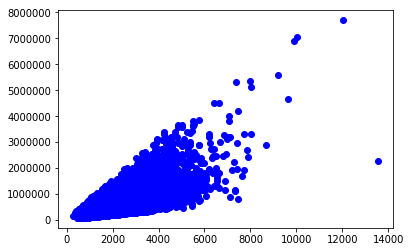

In [12]:
import matplotlib.pyplot as plt
plt.plot(sales['sqft_living'], sales['price'], 'bo')

# Split data into training and test set

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(sales, test_size=0.2, random_state=0)

In [14]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5268,5100402668,20150218T000000,495000,3,1.0,1570,5510,1.0,0,0,...,7,1070,500,1940,0,98115,47.6942,-122.319,1770,6380
16909,7856560480,20140808T000000,635000,3,2.5,1780,11000,1.0,0,0,...,8,1210,570,1980,0,98006,47.5574,-122.149,2310,9700
16123,2872900010,20150414T000000,382500,3,1.5,1090,9862,1.0,0,0,...,8,1090,0,1987,0,98074,47.6256,-122.036,1710,9862
12181,3216900070,20140617T000000,382500,4,2.5,2210,7079,2.0,0,0,...,8,2210,0,1993,0,98031,47.4206,-122.183,1970,7000
12617,976000790,20141020T000000,670000,3,2.5,1800,4763,2.0,0,0,...,7,1240,560,1985,0,98119,47.6460,-122.362,1790,4763


# Create a simple regression model of sqft to price

In [31]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
sqft_model = regr.fit(train.sqft_living.values.reshape(-1, 1), train.price.values.reshape(-1, 1))

# Investigate model details

In [32]:
sqft_model.coef_

array([[283.96855737]])

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(test['price'], sqft_model.predict(test['sqft_living'].values.reshape(-1, 1)))

61940787221.49825

In [18]:
r2_score(test['price'], sqft_model.predict(test['sqft_living'].values.reshape(-1, 1)))

0.47915770799654933

# Plot outputs

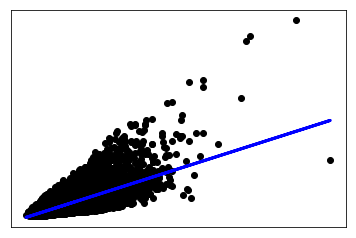

In [19]:
import matplotlib.pyplot as plt
plt.scatter(train['sqft_living'], train['price'],  color='black')
plt.plot(train['sqft_living'], sqft_model.predict(train['sqft_living'].values.reshape(-1, 1)), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# Explore other  features in the data

In [20]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

# Build a regression model with these features

In [21]:
my_features_model = regr.fit(train[my_features], train.price.values.reshape(-1, 1))

# Investigate model details

In [22]:
my_features_model.coef_

array([[-5.66006330e+04,  1.10870936e+04,  3.20408369e+02,
        -2.89499140e-01, -2.41800491e+03,  6.17971071e+02]])

In [23]:
mean_squared_error(test['price'], my_features_model.predict(test[my_features]))

59538329945.14362

In [24]:
r2_score(test['price'], my_features_model.predict(test[my_features]))

0.4993592813117592

# Apply learnt models to predict prices for 3 houses

In [26]:
house1 = sales[sales.id.isin(['5309101200'])]

In [27]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [28]:
print house1['price']

1054    620000
Name: price, dtype: int64


In [33]:
sqft_model.predict(house1.sqft_living.values.reshape(1, -1))

array([[633267.47422744]])

In [34]:
my_features_model.predict(house1[my_features])

array([[637556.26515923]])

# Prediction for 2nd fancier house

In [35]:
house2 = sales[sales.id.isin(['1925069082'])]

In [36]:
house2['price']

1361    2200000
Name: price, dtype: int64

In [37]:
sqft_model.predict(house2.sqft_living.values.reshape(1, -1))

array([[1269357.04273158]])

In [38]:
my_features_model.predict(house2[my_features])

array([[1274443.76531346]])